# 4

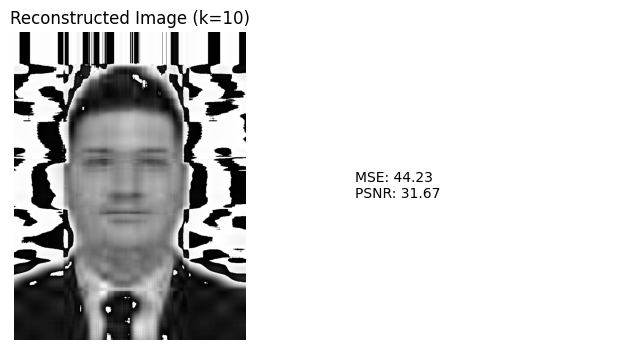

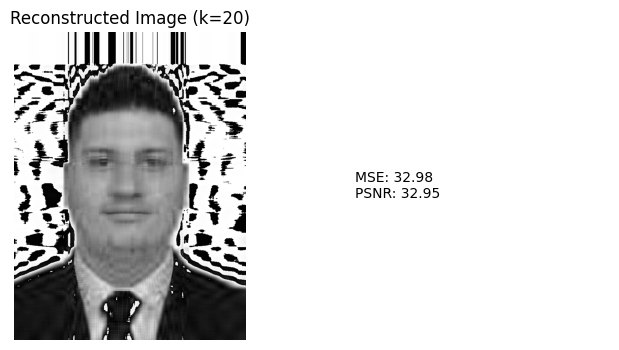

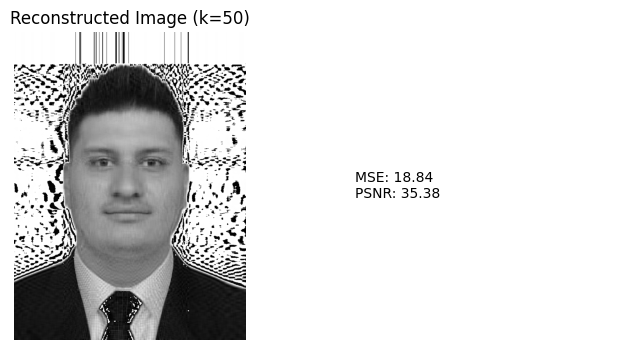

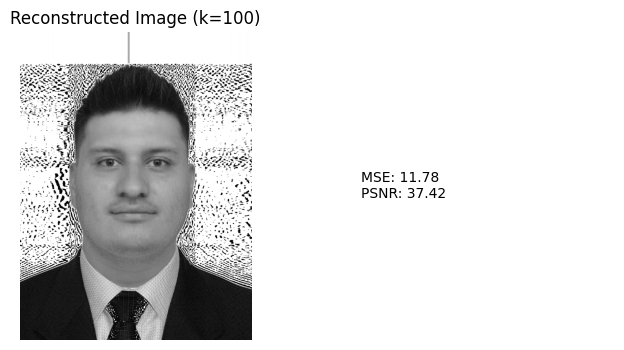

In [2]:
from svd import SVD_SCRATH
from pca import PCA_SCRATH

import matplotlib.pyplot as plt

# Path image
image_path = r'C:\Users\user\Downloads\foto.jpeg'

# Instance class
image_svd = SVD_SCRATH(image_path)

# SVD
U, S, VT = image_svd.svd()


# Number of main components to use for reconstruction
k_values = [10, 20, 50, 100]

for k in k_values:
    # Reconstruct image using k principal components
    reconstructed_image = image_svd.reconstruct_image(U, S, VT, k)

    # Calculate metrics
    mse_value, psnr_value = image_svd.calculate_metrics(image_svd.matrix, reconstructed_image)

    # Show the reconstructed image and metrics
    plt.figure(figsize=(8, 4))

    # Reconstructed Image
    plt.subplot(1, 2, 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image (k={k})')
    plt.axis('off')

    # Métricas
    plt.subplot(1, 2, 2)
    plt.text(0.1, 0.5, f'MSE: {mse_value:.2f}\nPSNR: {psnr_value:.2f}', fontsize=10, va='center')
    plt.axis('off')

    plt.show()

Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how
different your photo and the approximation are


- The more main components used, the better the image quality will be.
- To quantify how different the original photo and the approximation are, you could use image quality evaluation metrics. Some common metrics include Mean Squared Error (MSE) or Peak Signal-to-Noise Ratio (PSNR). These metrics will provide you with numerical values that indicate the discrepancy between the original image and the approximation. A low MSE value or a high PSNR value suggests a better approximation?

# 5

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784')

# Convert string labels to integers
mnist.target = mnist.target.astype(int)

# Select only images corresponding to digits 0 and 8
X = mnist.data[(mnist.target == 0) | (mnist.target == 8)]
y = mnist.target[(mnist.target == 0) | (mnist.target == 8)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the baseline logistic regression model:", accuracy)

Accuracy of the baseline logistic regression model: 0.9868900218499636


# 6

In [6]:
# Apply PCA for dimensionality reduction (using 2 components)
pca = PCA_SCRATH(n_components=2)

# fit the data
pca.fit(X)

# transform the data using the PCA object
X_transformed = pca.transform(X)

print(X.shape)
print(X_transformed.shape)

(13728, 784)
(13728, 2)


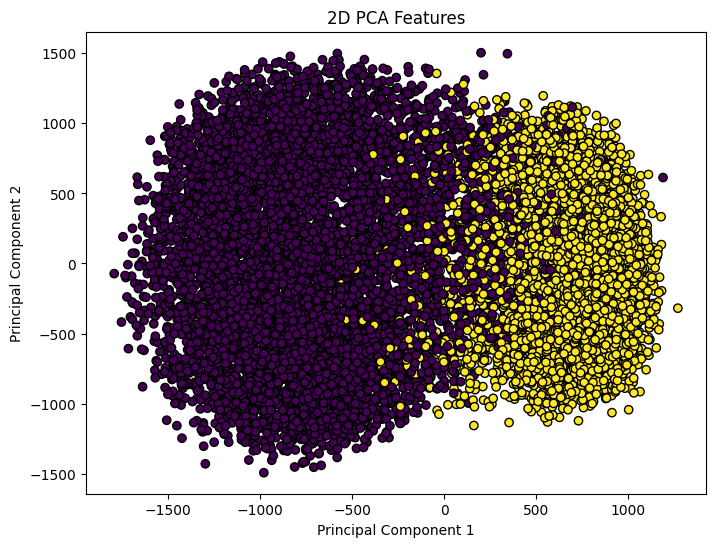

In [7]:
# Plot the 2 new features generated by PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title("2D PCA Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Training Model

Accuracy of the model with 2 features per image: 0.9541150764748726


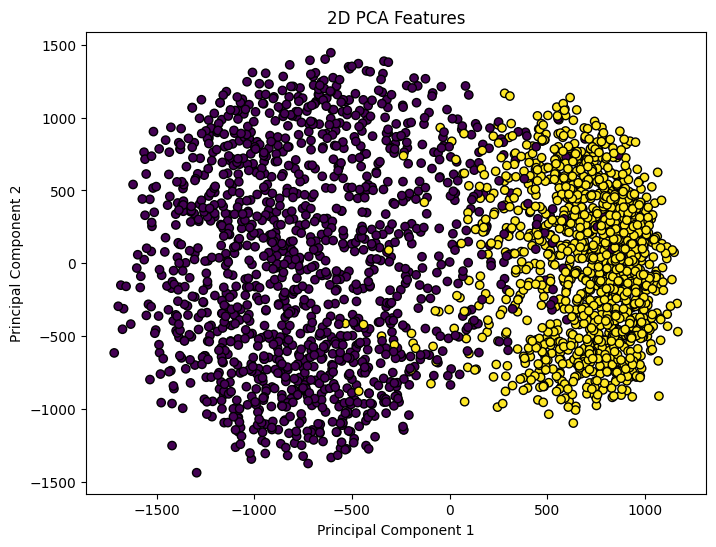

In [8]:
# Apply PCA for dimensionality reduction (using 2 components)
pca = PCA_SCRATH(n_components=2)
pca.fit(X_train)
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

# Train a logistic regression model on the reduced feature space
model = LogisticRegression(max_iter=3000)
model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model with 2 features per image:", accuracy)

# Plot the 2 new features generated by PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=y_test, cmap='viridis', marker='o', edgecolor='k')
plt.title("2D PCA Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Does this somehow impact the performance of your model?

- The Accuracy  for the model using PCA with 2 components was lower than when the naive logistic regression base line model was used.

# 7

Accuracy of the model with 2 features per image (Scikit-Learn): 0.9541150764748726


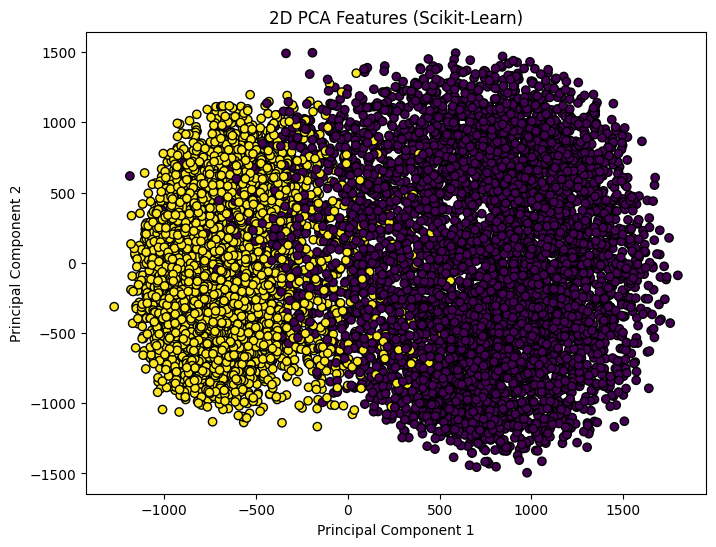

In [10]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction (using 2 components)
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

# Train a logistic regression model on the reduced feature space
model = LogisticRegression(max_iter=3000)
model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model with 2 features per image (Scikit-Learn):", accuracy)

# Plot the 2 new features generated by PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k')
plt.title("2D PCA Features (Scikit-Learn)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The Scikit-Learn implementation achieves the same goal of dimensionality reduction using PCA and training a logistic regression model, but is more streamlined and concise.

Comparing the results of the Scikit-Learn implementation with the custom implementation, similar performance metrics (accuracy) and visualizations are observed.

The PCA implementation of Scikit-Learn incorporates additional optimizations and functionality that make it more suitable for general use. However, the basic principles and results are expected to be similar between the custom implementation and the Scikit-Learn implementation.

# 8

1. Estandarizar o normalizar datos:

  PCA es sensible a la escala de las características. Estandarizar o normalizar los datos antes de aplicar PCA garantiza que todas las características contribuyan por igual a la variación.
  
  Implementación utilizando Scikit-Learn:

Sccuracy of the model with 2 features per image (Scikit-Learn): 0.9431900946831755


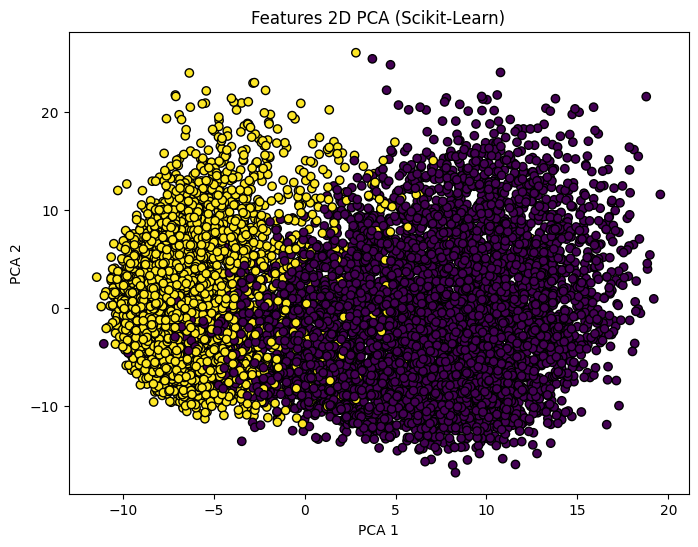

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# Apply PCA
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train_scaled)


# Train model
model = LogisticRegression(max_iter=3000)
model.fit(X_train_transformed, y_train)

# Predict
y_pred = model.predict(X_test_transformed)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Sccuracy of the model with 2 features per image (Scikit-Learn):", accuracy)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k')
plt.title("Features 2D PCA (Scikit-Learn)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


# 9

What are the underlying mathematical principles behind UMAP? What is it useful for?

- UMAP (Uniform Manifold Approximation and Projection) is an innovative manifold learning technique designed to reduce data dimensionality. It is constructed based on a theoretical framework utilizing Riemannian geometry and algebraic topology. As a result, it yields a practical and scalable algorithm applicable to real-world datasets. In terms of visualization quality, UMAP competes with t-SNE and arguably preserves more of the global structure while exhibiting superior runtime performance. Furthermore, UMAP imposes no computational restrictions on embedding dimension, making it a versatile choice as a general-purpose dimension reduction technique for machine learning.

Use Cases and Applications:

 - 
Dimensionality Reduction for Visualization:

UMAP is widely employed to visualize high-dimensional data in 2D or 3D, enabling the exploration of complex relationships and patterns within the dat

- a.
Cluster and Density Analysi    s:

UMAP can be used for cluster analysis as it preserves the local structure of the data. It is particularly effective in revealing densely packed clusters and their relationships.

# 10

What are the underlying mathematical principles behind LDA? What is it useful for?

Latent Dirichlet Allocation (LDA) is a generative probabilistic model that falls under the category of topic modeling. The underlying mathematical principles behind LDA involve probability distributions, specifically the Dirichlet distribution.

1. Dirichlet Distribution:
 - LDA assumes that documents are mixtures of topics, and each topic is a mixture of words. The Dirichlet distribution is used to model these mixtures.
 - In LDA, it is assumed that there is a Dirichlet distribution over topics for each document, and a Dirichlet distribution over words for each topic.
 - The Dirichlet distribution is characterized by a set of parameters that determine the shape of the distribution.

2. Generative Process:
- LDA defines a generative process for creating documents. It assumes that each document is a mixture of a small number of topics, and each word in the document is attributable to one of the document's topics.
- The generative process involves selecting a distribution over topics for each document, and then for each word in the document, selecting a topic from that distribution and choosing a word from the topic's distribution.

LDA is useful for:

- Topic Modeling: LDA is widely used for uncovering topics in a collection of texts. It helps identify the underlying themes or subjects within the documents
- Document Classification: LDA can be applied to classify documents into topics. Once the topics are identified, new documents can be assigned to these topics based on their content.
- Information Retrieval: LDA can enhance information retrieval by associating documents with relevant topics, making it easier to search and retrieve documents based on their thematic content.
- Content Recommendation: Understanding the topics within documents allows for more accurate content recommendations, as it helps in identifying related or similar documents.